#### 케라스를 이용하여 아래를 만족하는 적절한 $\beta_0$와 $\beta_1$을 구하라. 적합결과를 시각화하라. (애니메이션 시각화 X) 

model: $y_i \approx \beta_0 +\beta_1 e^{-x_i}$ 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 

In [3]:
import tensorflow.experimental.numpy as tnp 
tnp.experimental_enable_numpy_behavior()

In [4]:
np.random.seed(43052) 
N= 100 
x= np.linspace(-1,1,N)
epsilon = np.random.randn(N)*0.5 
y= 2.5+4*np.exp(-x) +epsilon

In [5]:
X=np.stack([np.ones(N),np.exp(-x)],axis=1) 
y=y.reshape(N,1)
X.shape, y.shape

((100, 2), (100, 1))

In [6]:
net = tf.keras.Sequential() # 1: 네트워크 생성
net.add(tf.keras.layers.Dense(1,use_bias=False)) # 2: add layer 
net.compile(tf.optimizers.SGD(0.1), loss='mse') # 3: compile
net.fit(X,y, epochs=50, batch_size=N) # 4: fit 

Epoch 1/50
1/1 [==============================] - 0s 186ms/step - loss: 29.4900
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 6.6295
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 1.6509
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 0.5658
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 0.3284
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: 0.2757
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 0.2633
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2597
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 0.2580
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 0.2569
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2559
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2550
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss:

In [7]:
net.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.5234675],
        [3.9541025]], dtype=float32)>]

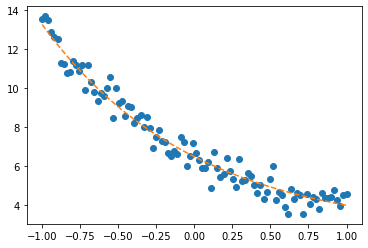

In [8]:
plt.plot(x,y,'o') 
plt.plot(x,(X@net.weights).reshape(-1),'--')